In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My Drive/Namsik-Lab/딥러닝 공부/keras/data/'

/bin/bash: ls/drive: No such file or directory


In [0]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
import matplotlib
import matplotlib.pyplot as plt

In [0]:
## 데이터셋 생성
(x_train, y_train), (x_test, y_test) = mnist.load_data()

some_digit_image_label :  5
x_train_shape :  (60000, 28, 28)
y_train_shape :  (60000,)
x_test_shape :  (10000, 28, 28)
y_test_shape :  (10000,)


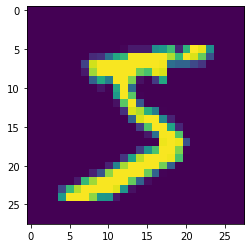

In [0]:
some_digit = x_train[0]
plt.imshow(some_digit)
print('some_digit_image_label : ',y_train[0])
print('x_train_shape : ', x_train.shape)
print('y_train_shape : ', y_train.shape)
print('x_test_shape : ', x_test.shape)
print('y_test_shape : ', y_test.shape)

In [0]:
x_train = x_train.reshape(60000,784).astype('float32') /255.0
x_test = x_test.reshape(10000,784).astype('float32') / 255.0
some_digit = x_train[0]
some_digit

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
# 원핫 인코딩
# 분류해줄 클래스를 0,1,2... 같은값이 아닌 벡터 [1,0,0,...], [0,1,0,...]으로 변환해줌
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_val = x_train[:42000] 
y_val = y_train[:42000]
# 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_train = y_train[42000:]

In [0]:
model = Sequential() ## 선형모델로 구분해보자
model.add(Dense(units = 64, input_dim = 28*28, activation = 'relu'))
## units = 출력뉴런의 수, input_dim = 입력뉴런의 수, 
## init = 가중치 초기화 방법 설정, activation = 활성화 함수 설정
model.add(Dense(units=10, activation = 'softmax'))

In [0]:
# 모델 학습과정 설정하기
model.compile(loss= 'categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [0]:
model.fit(x_train,y_train, epochs = 50, batch_size = 32, validation_data = (x_val,y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/50
18000/18000 [==============================] - 2s 123us/sample - loss: 1.1276 - acc: 0.7237 - val_loss: 0.6345 - val_acc: 0.8474
Epoch 2/50
18000/18000 [==============================] - 2s 111us/sample - loss: 0.5051 - acc: 0.8711 - val_loss: 0.4689 - val_acc: 0.8748
Epoch 3/50
18000/18000 [==============================] - 2s 113us/sample - loss: 0.4069 - acc: 0.8893 - val_loss: 0.4091 - val_acc: 0.8863
Epoch 4/50
18000/18000 [==============================] - 2s 112us/sample - loss: 0.3627 - acc: 0.8995 - val_loss: 0.3752 - val_acc: 0.8939
Epoch 5/50
18000/18000 [==============================] - 2s 112us/sample - loss: 0.3348 - acc: 0.9061 - val_loss: 0.3533 - val_acc: 0.9006
Epoch 6/50
18000/18000 [==============================] - 2s 112us/sample - loss: 0.3146 - acc: 0.9119 - val_loss: 0.3368 - val_acc: 0.9054
Epoch 7/50
18000/18000 [==============================] - 2s 111us/sample - loss: 0.2988 - acc: 0.9182 - val_l

In [0]:
# 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 27us/sample - loss: 0.1758 - acc: 0.9482

loss_and_metrics : [0.17582604438811542, 0.9482]


In [0]:
# 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 5, Predict : 5
True : 9, Predict : 9
True : 5, Predict : 8
True : 4, Predict : 4
True : 7, Predict : 7


In [0]:
# 모델 저장 및 불러오기
from tensorflow.keras.models import load_model

model.save(root_dir+'mnist_mlp_model.h5')
model = load_model(root_dir+'mnist_mlp_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


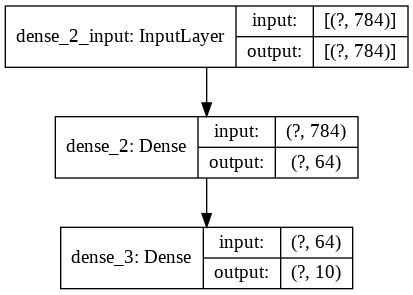

In [0]:
# 모델 구조 보기
from tensorflow.keras.utils import plot_model
%matplotlib inline

plot_model(model, show_shapes= True)

In [0]:
# 뉴런 별 가중치
model.get_weights()

[array([[ 0.00086536,  0.06935903, -0.01314755, ..., -0.04632483,
          0.010434  , -0.05885224],
        [ 0.05311852,  0.00893681,  0.05087208, ...,  0.0426924 ,
         -0.06701811,  0.0726993 ],
        [ 0.07815974, -0.05546842,  0.04259949, ..., -0.05975439,
         -0.04334499, -0.06152865],
        ...,
        [-0.02556105,  0.05629263,  0.05518609, ...,  0.00387076,
          0.00794105,  0.0147618 ],
        [-0.0226208 , -0.02895262, -0.03888731, ...,  0.07708763,
         -0.03564171, -0.0040542 ],
        [ 0.0498146 ,  0.03605022,  0.01160379, ..., -0.06092292,
          0.00168947,  0.0241297 ]], dtype=float32),
 array([ 0.1366462 ,  0.12385989,  0.14874335, -0.02668943, -0.02485313,
        -0.16080853,  0.13562556,  0.00191603,  0.10126542, -0.00878998,
        -0.00678006,  0.11288636,  0.06228764, -0.05477837, -0.02290927,
        -0.00828816, -0.04461279,  0.0027618 , -0.07485262, -0.00497226,
        -0.0386808 , -0.08804767,  0.05661215,  0.07286991, -0.103